In [ ]:
## This is the first step in any notebook I create - I need lots of screen space!
## Provide a wider display for easier viewing
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Creating Basic Neural Networks with Keras & Tensorflow

<b>Danny Moncada</b>

Office of Human Resources, Data & Reporting Analyst; Carlson School of Management, MSBA student

# <span style="color:#ffcc33">I. Project Background</span>

I developed this notebook/analysis as part of my final homework assignment for my Predictive Analytics course in December 2019.  The <b>original</b> analysis took about three weekends' worth of development work and many, many iterations to get right.  We'll try to condense it a bit for the Day of Data so you can grasp the main concepts in a single session!

The main goals of the assignment were as follows: 

1. Take a non-linear function (see Figure 1 below)
2. Sample points from the function to create a simulated dataset that demonstrates a complex, non-linear relationship between X and Y
3. Build and train three different versions of a neural network to perform a regression task using this simulated data
4. Try different neural network architectures to see which performs best. Try to replicate the performance charts shown in Figure 2, which show the neural network performance results for different network setups.
 
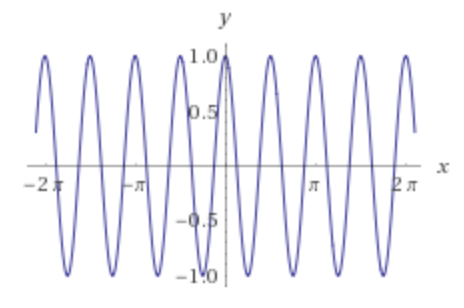

<center><strong>Figure 1:</strong> The non-linear function used to simulate data: $f(x) = 2 \left( 2\cos^2 (x) - 1 \right)^2 - 1$</center>

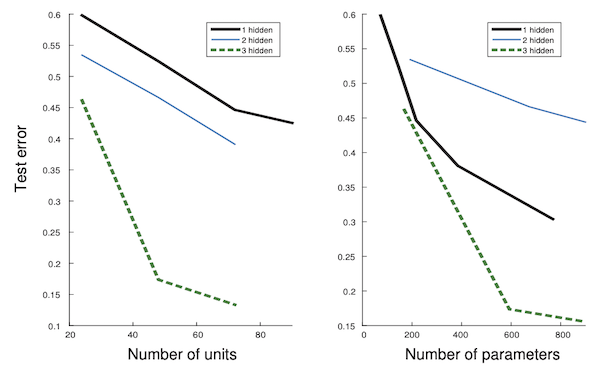

<center><strong>Figure 2:</strong> Neural network performance results</center>

Seems pretty simple right?  Well members of the audience, we are about to find out how <b>wrong</b> that assumption is.

## Here is a more comprehensive overview of the problem statement, which was taken from the research paper <i>When and Why Are Deep Networks Better than Shallow Ones?</i> [1].

"A sparse (because it has only a few of the possible terms) trigonometric polynomial <b>f(x) = 2(2 cos^2(X) − 1)^2 − 1</b> with one input variable is learned in a regression set-up using standard deep networks with 1, 2 or 3 hidden layers.

1. In the 1 hidden layer setting, 24, 48, 72, 128 and 256 hidden units were tried. 
2. With 2 hidden layers, 12, 24 and 36 units per layer were tried. 
3. With 3 hidden layers, 8, 16 and 24 units per layer were tried. Each of the above settings was repeated 5 times, reporting the lowest test error." 
<b>[1, pg. 2348]</b>

I won't follow the <u>exact</u> steps outlined in the paper (I am not even sure what they used to actually program their models), but you will see (eventually) that I get pretty close to recreating the plot above.

# <span style="color:#ffcc33"> II. Machine Learning Basics

## OK, so we have a high-level idea of the regression task we want to tackle here.  But how does machine learning help us with this task?  Well, let's briefly explain the basic concept of what "Machine Learning" is.

Many of you may have seen these two definitions before (especially if you are an MSBA student!!):

> "A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E." - Tom Mitchell, 1997

> "[Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed." - Arthur Samuel, 1959
    
From Wikipedia:

> "Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence.
    
> Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

> Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop a conventional algorithm for effectively performing the task."

And finally, here's an definition and picture from <i>Hands-On Machine Learning with Scikit-Learn and TensorFlow</i>:

<i>"What Is Machine Learning?  Machine Learning is the science (and art) of programming computers so they can learn from data.</i><br>

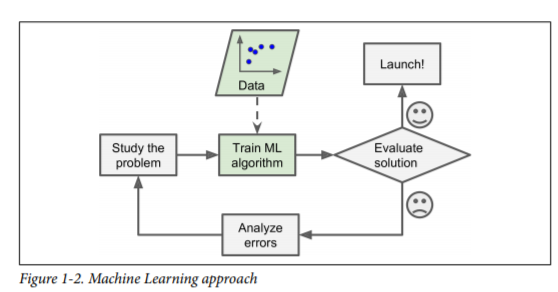

<div style="text-align: center"><b>[2, pg. 4-6]</b></div>

## OK, so we've established that a computer can learn, and that it can learn on its own, if programmed correctly.  How does it actually do this?

<b>Supervised / Unsupervised Learning</b>

Machine Learning systems are classified according to the amount and type of supervision they get during training.

* Two major categories:
    * Supervised learning (classification, regression)
    * Unsupervised learning (find patterns in unlabeled data)

For this session, we will focus on the first category: supervised learning.  In <i>supervised</i> learning, the training data you feed to the ML algorithm includes the desired outcomes or target; these go by many names, including label, target, class.  If our data was a dartboard, this would be our bulls-eye.

There are two main types of supervised learning tasks:

<b>1. Classification and class probability estimation</b>

An email spam filter is a good example of this: it is trained with many example emails along with their class (spam or not spam), and it must learn how to classify new emails.

* How likely will a customer to respond to our mailing campaign?
* How likely is it that this patient will have diabetes based on previous medical history?
* How likely will this customer default on their loan based on their credit history (and that of others similar to this person)?

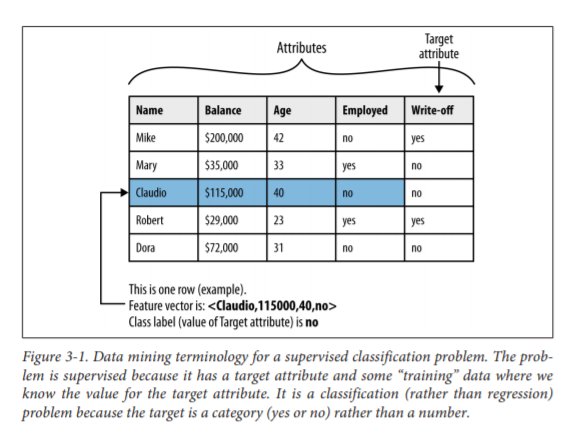

<div style="text-align: center"><b>[3, pg. 45]</b></div>

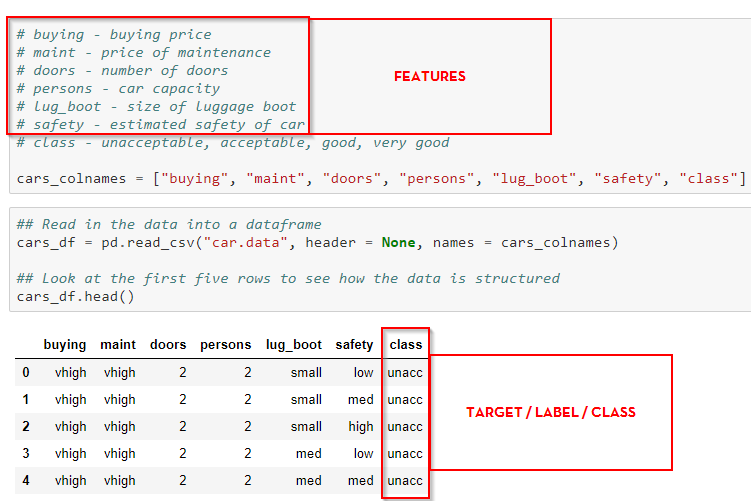

<b>2. Numerical predictions (e.g., Regression)</b>

Another typical task is to predict a <i>numeric</i> value/target (i.e, 0, 1, 2).  A ML algorithm, given a set of <b>features</b>(predictors) about a car (mileage, age, brand, etc), might be able to "guess" the price of that car, without having ever seen it.  This task is called <i>regression</i>; to train a ML algorithm for regression, you need to give it many** examples of cars, including both their predictors and their <b>labels</b> (i.e., the price of the car).

* What would this person rate a movie out of 1 through to 5?
* How many people will be visiting the amusement park on a daily basis?
* How much will this customer spend at our online store over their lifetime (based on previous spending history)?

**<i>I cannot emphasize the last point enough - ML algorithms needs LOTS of data - we'll explore why in more depth later.</i>

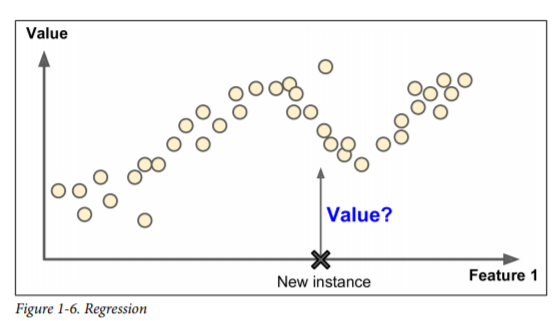

<div style="text-align: center"><b>[2, pg. 9]</b></div>

## We've covered the basic background information needed to perform our regression task.  There's a wealth of information online and in print that goes into this much more in depth; you can find the sources for many of the graphics and definitions at the end of the notebook.

Does anyone need a nap?  I think I'm ready for one.

# <span style="color:#ffcc33">III.  Environment & Library Setup
    
- Load all of the necessary libraries and show the environment details**</span>

**This is so anyone that would like to replicate the analysis can use try to closely mirror / mimic the environment required to perform this regression task

## You will see there's a few different importing steps - I do a big chunk of imports here at the beginning (to show the different versions of the packages being used), and later on to import the libraries needed for the neural network development.

In [ ]:
## Remove some warnings that pop up from running libraries that are using old conversion techniques - don't ask!
import warnings
warnings.filterwarnings("ignore")

## Data analysis libraries
## Python for Data Analysis - used to generate dataframes and manipulate the data to format needed for many of the visualizations (SQL/Excel)
import pandas as pd
## Numerical Python - used for some of the mathematical functions required in the analysis
import numpy as np
## Random - used to generate the random seeds needed for making the results reproducible
import random

## Visualization libraries
## Seaborn - used for visualizing data (amazing library!!!)
import seaborn as sns
## Matplot - used for visualizing data in conjunction with Seaborn
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
## Graphviz - used for generating visualizations of the networks - only used once!
import graphviz as gviz

## Machine learning libraries
## Sci Kit Learn - one of the main machine learning libraries for Python, used to generate a lot of the tests required to see how well the models are performing
import sklearn
from sklearn import *
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import *
## Tensorflow - used in conjunction with Keras to build the neural networks
import tensorflow as tf
## Keras - used in conjuction with Tensorflow to build the neural networks
import keras

## Sys - used to list the environment details
import sys

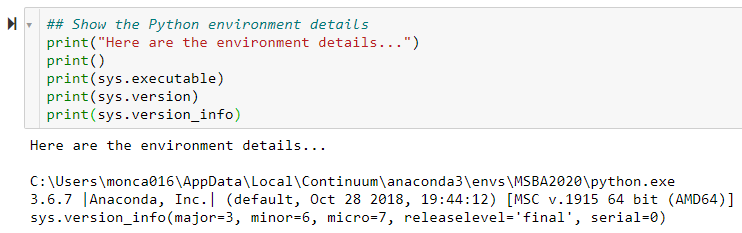

<br>
<div style="text-align: center"><b>[This code block is a screenshot.  What I am showing here is that this entire notebook was developed & run on my work laptop - you don't need a lot of power to do this stuff!]</b></div>

In [ ]:
## Show the different versions for each library used in the Python exploration
print("Here are the libraries used to perform the data manipulation tasks:")
print()
print("This notebook is using pandas version: {}.".format(pd.__version__))
print("This notebook is using numpy version: {}.".format(np.__version__))
print()

print("Here are the libraries used to perform the data visualization tasks:")
print()
print("This notebook is using seaborn version: {}.".format(sns.__version__))
print("This notebook is using matplotlib version: {}.".format(matplotlib.__version__))
print("This notebook is using python-graphviz version: {}".format(gviz.__version__))
print()

print("Here are the libraries used to perform the machine learning tasks:")
print()
print("This notebook is using sklearn version: {}.".format(sklearn.__version__))
print("This notebook is using tensorflow version: {}.".format(tf.__version__))
print("This notebook is using keras version: {}.".format(keras.__version__))
print()

print("And finally, this notebook is powered by arepas and many, many cups of coffee.")

#  <span style="color:#ffcc33">IV.  Data Generation & Visualization of Regression Problem</span>

1. Create the data points outlined in the white paper
2. Split the data into a training and testing set
3. Plot the data to show the relationship of what we are trying to predict

In [ ]:
## Create pi and cosine using numpy functions - so that I can actually create the data points outlined in the white paper
pi = np.pi
cos = np.cos

In [ ]:
## Generate 120K data points using a (-2*pi, 2*pi) uniform distribution
X = np.random.uniform(-2*pi, 2*pi, 120000)

In [ ]:
## Feed the X data points from the distribution in the y function to get my output
y = 2 * (2 * cos(X)**2 - 1) ** 2 - 1

In [ ]:
## Split data training 50 % and testing 50%, just like they did in the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [ ]:
## Print the lengths of the training / testing split to confirm I have the right splits
print("The length of the training data set is: {}".format(len(X_train)))
print("The length of the testing data is : {}".format(len(X_test)))

## Training data and testing data are important concepts for machine learning.  Let's briefly go over the basics:

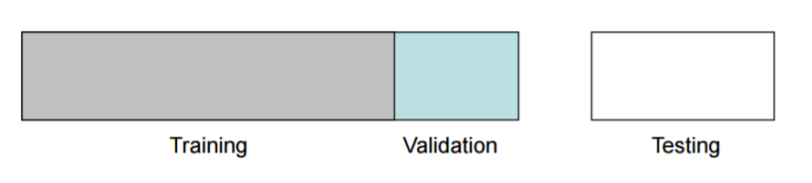


The <b>training</b> set is the material through which the computer learns how to process information. ML uses an algorithm(s) to "mimic" the human brain, which can take in diverse inputs and <i>weigh</i> them, in order to produce <i>activations</i> in individual neurons in the brain.  ML uses "artificial" neurons to replicate this process with software (albeit not as well as the brain).  ML and neural network programs provide highly detailed models of how our human thought process works.

To tie this back to one of our original definitions: "The examples that the system uses to learn are called the **training** set. Each training example is called a training instance (or sample). In this case, the task T is to flag spam for new emails, the experience E is the training data, and the performance measure P needs to be defined; for example, you can use the ratio of correctly classified emails." <b>[2, pg. 4]</b>

However, training data used to train and tune your model will only produce the best model for that particular training set.  This means that the model is unlikely to perform as well on <u>new</u> data.  So what we do is create a <b>validation</b> set, which is essentially a <i>subset</i> of the training data.

"A common solution to this problem is called holdout validation: you simply hold out part of the training set to evaluate several candidate models and select the best one.  The new heldout set is called the <b>validation</b> set (or sometimes the development set, or dev set)." <b>[2, pg. 32]</b>

<b>Testing data</b> is typically reserved the final model evaluation purpose.  We will see this during the last set of analyses.

## Now that we know why we did the split of training and testing data, we should plot a few of the data points combined to show the relationship between X and Y; what is our model trying to guess/predict, and can this help us narrow down what kind of ML model to build?

In [ ]:
## Turn the X and Y values generated above in a data frame with columns called 'Predictor (X)' and 'Target (y)'
full_df = pd.DataFrame({"Predictor (X)": list(X), 
                          "Target (y)": list(y)},
                                 columns = ["Predictor (X)", "Target (y)"])

## We grab the first 1,000 data points (out of 120,000!!!) just to show the relationship between the data points
plot_df = full_df[0:1000]

In [ ]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create two new sub plots so we can show the training and validation performance side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

## Save the new plots as variables to save us typing below
ax1 = axes[0]
ax2 = axes[1]

## Build a quick plot showing the relationship between the variables - looks like it will be a moving target!
sns.scatterplot(data = plot_df, x = "Predictor (X)", y = "Target (y)", color = "blue", ax = ax1)

## Build another plot showing what a linear regression (relationship) would look like
sns.regplot(data = plot_df, x = "Predictor (X)", y = "Target (y)",
           scatter_kws = {"color": "maroon"}, line_kws = {"color": "gold", "label": "Linear Regression line"}, ax = ax2)

## Show the legend for our second plot
plt.legend(loc = "upper right")

## Show the plot
plt.show()

## Pretty waves - it might be difficult to try to guess where a random point lands based on this relationship though!

## You might be asking why I decided to build a neural network for this problem, when there are dozens of different algorithms available to us.  I will introduce one more concept (you can tell me to stop at any point - but now you know how I felt during lecture every week!!) - No Free Lunch Theorem.

"In a famous 1996 paper, David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the <i>No Free Lunch</i> (NFL) theorem. For some datasets the best model is a linear model, while for other datasets it is a neural network. There is no model that is <i>a priori</i> guaranteed to work better (hence the name of the theorem). The only way to know for sure which model is best is to evaluate them all. Since this is not possible, in practice you make some reasonable assumptions about the data and you evaluate only a few reasonable models. For example, for simple tasks you may evaluate linear models with various levels of regularization, and for a complex problem you may evaluate various neural networks." <b>[2, pg. 33-34]</b>

## This seems like a pretty complex problem to me!  So let's go with that!

# <span style="color:#ffcc33">V.  Model Creation and Training
    
1. Build all of our neural networks
2. Train them
3. Evaluate their performance

Artist's rendition of ML training:

           o x o x o x o . . .
         o      _____            _______________ ___=====__T___
       .][__n_n_|DD[  ====_____  |    |.\/.|   | |   |_|     |_
      >(________|__|_[_________]_|____|_/\_|___|_|___________|_|
      _/oo OOOOO oo`  ooo   ooo   o^o       o^o   o^o     o^o
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

## I will build and train 3 Neural Network models - to demonstrate how quickly a ML algorithm can "learn" a data set.  If we get lucky, we will see that when we create and train a three layer NN model, not only is the ML algorithm "learning" the data, it's likely <i>memorizing</i> the data.  This is a common problem in ML which will talk about later.

* Neural Network with <span style="color:gold"> 1 hidden layer</span>
* Neural Network with <span style="color:blue"> 2 hidden layers</span>
* Neural Network with <span style="color:red"> 3 hidden layers </span>

I will use the Mean Squared Error as the <b>objective function</b> & <b>error measurement</b>.  I know I said I was going to stop throwing concepts at you, but just get used to being uncomfortable and alone in the darkness.  It's the only way to make it through this session!

An objective function is also known as a <i>loss function</i> (or optimization score function) and is one of the two parameters required to compile a NN model.  Remember way back when we talked about how ML uses an algorithm to <i>weigh</i> (to assign them importance) inputs?  This is how the model knows what is important and what is not.  This is a gross oversimplification of the process but it gives you an idea of how it will work.

The error measurement is also known as a <i>metric function</i>; it is used to assess how well the models are performing.  Metric functions are supplied in the metrics parameter when a model is compiled.

In [ ]:
## Another import step to import the libraries needed to build the models
## I won't go into much depth here - much of the documentation is online and will do a much better job explaining how it all works under the hood

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import np_utils

In [ ]:
## Confirm the shape of both our "features" and our target - this will influence what we need to input into the models
## X_train is the variable that contains all of our PREDICTOR values - we'll show the first five values
print("Here is our predictor data - our X values:")
print()
print(X_train[0:5])
print()
print("Here are how many training points we have:")
print()
print(X_train.shape)

In [ ]:
## y_train is the variable that contains all of our TARGET values - we'll show the first five values too
print("Here is our target data - our y values:")
print()
print(y_train[0:5])
print()
print("Here are how many target points we have to learn from - all BULLS-EYES:")
print()
print(y_train.shape)

In [ ]:
## Based on the problem statement above from the paper, here is what they used to build their models.
## You see that they are commented out because I did not use these settings - I am not sure what technology they even used to produce the plots
## You can try setting them yourself in this notebook later on!

# learning_rate = 0.0001
# batch_size = 3000
# passes = 2000

## A.  <span style="color:gold"> One Layer NN Model</span> (shallow)

Note: a very confusing thing here is that the <i>shape</i> of the input to the model is defined as an argument on the first hidden layer.  This means that the line of code that adds the first Dense layer is doing 2 things: define the <i>input</i> or visible layer <u>and</u> the first hidden layer.

When I go through the steps to build the models, I've commented each line with what we're doing - if you want more in depth information on how Keras & Tensorflow work, check the end of the notebook for links to the official documentation for both Python libraries.

In [ ]:
## Here are the different hidden units that we want to use for the first model, which is one layer
## Choosing four values to showcase the difference in layers for each model - I selected these after a few different attempts
## We'll use less units for the other models since they will take longer to train

one_layer_nb_hiddens = np.array([24, 48, 128, 256])

In [ ]:
## Create a function to build the one layer model
def test_model_one(activation='relu', nb_hidden = 120):
    
    ## Base model
    one_layer_model = Sequential()
    
    ## Add the one and only layer, we will cycle through the different hidden units, but keep the same activator constant
    one_layer_model.add(Dense(nb_hidden, input_dim = 1, activation = activation))
    
    ## Add the output layer, with one node and using the linear activation function
    one_layer_model.add(Dense(1, activation = "linear"))
    
    ## We will define the optimizer as the efficient stochastic gradient descent algorithm "adam". 
    ## This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.
    one_layer_model.compile(loss = "mse", optimizer = "adam", metrics = ["mse"])
    
    ## Return the completed model
    return one_layer_model

## Very quickly, we will do two things here: print a summary of a "sample" model, and then also create a quick visualization of the model.

This is not required but it is a good practice just to confirm the model is set up the way you had intended.  And we finally get a chance for you to modify the notebook!

<span style = "color:red">You can change the number of neurons by updating the `neurons` variable.  What happens when you add more neurons?  How does the model summary change?</span>

In [ ]:
## You can change this to any number of neurons that you want - what happens when you do?
neurons = 24

sample_model_one = test_model_one(nb_hidden = neurons)

## This will show a quick summary table of the sample one layer model
print(sample_model_one.summary())
print()

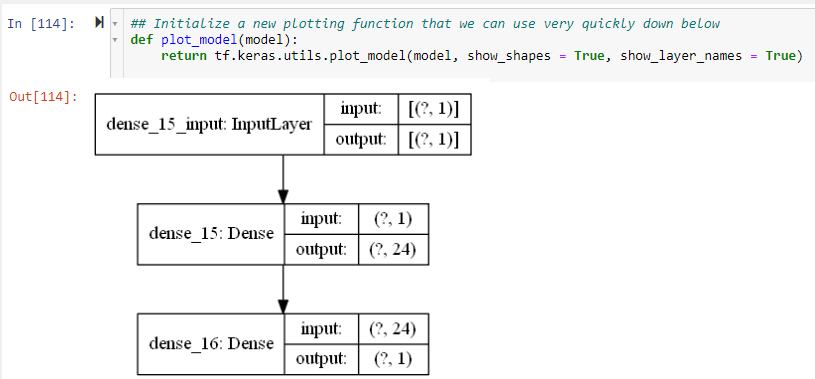

<br>
<div style="text-align: center"><b>[This code block is another screenshot.  In the run up to the event, I broke my notebook trying to make the package needed to generate this graphic available to the entire group.  Sometimes you can screw up your OWN analysis so be careful!]</b></div>

## Now that we've reviewed the model summary output, we THINK it will perform the regression task we need it to.  We will train the one layer model FOUR times - training different numbers of neurons.  This does take some time to run so while it runs we can go over a few things.

Training occurs over <i>epochs</i> (training cycles); we could also split each epoch is <i>batches</i> so we're not just dumping all 50,000 data points at once.  One epoch is comprised of one or more batches, based on the chosen batch size and the model is <i>fit</i> (trained) for many epochs.
  
- Epoch: One pass through all of the rows in the training dataset.
- Batch: One or more samples considered by the model within an epoch before weights are updated.  <span style="color:blue"> (I skipped this step to save us some time)
    
You'll noticed the `validation_split` piece of code; this will chunk out a specific percentage of the training set and use it as our validation set; here I am pulling out 15% of the training data for validation.  You can use ANY number, but it would behoove you to leave more training data than validation data (otherwise your model won't have to learn with and will just feel bad doing so poorly at its task!  ML has feelings too!).

* <span style = "color:red">What happens if you change this split to .5 (or any other split) and try running the model?  Do we see the same results?</span>
* <span style = "color:red">What happens if you change `verbose` to 0?  What do you notice?</span>

In [ ]:
## Save our results to an empty list so that we can capture this and plot it later
one_layer_model_results = []

## Set a random seed so we can reproduce the results across multiple runs of the notebook
random.seed(1337)

## Loop through all of the hidden layers and replace the hidden units in each iteration of tests
for i in one_layer_nb_hiddens:
    
    ## Establish a new version of our model above
    one_layer_model = test_model_one(nb_hidden = i)
    
    ## Save the history of the model and use 15% of the training data to validate our model results
    ## Validation split is used to prevent overfitting
    ## Put random seed so I can reproduce the results
    history = one_layer_model.fit(X_train, y_train, epochs = 20, verbose = 2, validation_split = 0.15)
    
    ## Save the results into the list above
    one_layer_model_results.append(history)

## Most of these configurations can be chosen experimentally by trial and error.

I did a lot of this trial and error but removed all of those steps from the final write-up - most of it was incomprehensible code that would be very confusing (even to me - that's why you should put comments on every line!).  We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output target.

The model will always have <i>some</i> error, but the amount of error levels out after some point for any given model configuration - this is called <b>model convergence</b>.

## Let's plot the results of the one layer model to see how it performs!

In [ ]:
## Save the results of our validation MSE - whichever does the best from the three will get trained and tested again with the actual test data
## All of the history has been saved to an empty list, and we can reference them very quickly by saving them as variables
## I could do a lot of this using loops but for the sake of the participants I tried to make the coding intuitive (and I'm a lazy programmer)
first_run_mse = one_layer_model_results[0].history['val_mse']
second_run_mse = one_layer_model_results[1].history['val_mse']
third_run_mse = one_layer_model_results[2].history['val_mse']
fourth_run_mse = one_layer_model_results[3].history['val_mse']

In [ ]:
### Reset seaborn to the default white background - for better viewing, especially with all of our colors!
sns.set_style("white")

## Set the figure size    
plt.figure(figsize= (15, 10))

## Plot validation Mean Squared Error to quickly visual the best performing model
plt.plot(first_run_mse, 'r-o', label = "24 hidden units - Validation MSE")
plt.plot(second_run_mse, 'y-o', label = "48 hidden units - Validation MSE")
plt.plot(third_run_mse, 'g-o', label = "128 hidden units - Validation MSE")
plt.plot(fourth_run_mse, 'b-o', label = "256 hidden units - Validation MSE")

## Give some descriptive labels
plt.xlabel("No. of Epochs")
plt.ylabel("Mean Squared Error")

## Title and legend
plt.title("Validation MSE Comparison - One Layer Neural Network")
plt.legend()

## Set the correct number of training cycles on the x-axis - matplotlib likes to use it's own weird config!
ax = plt.gca()
ax.set_xticks(np.arange(0, 20, step = 1))

# Set the y-axis scale so we have a consistent comparison across models
ax.set_yticks(np.arange(0.4, 0.6, step = 0.01))

## Show the graph
plt.show()

We can see that, regardless of how many hidden units/"neurons" we include in the one layer NN model, it doesn't really seem to perform well at all!  We see a lot of fluctuations in the validation Mean Squared Error (MSE) from epoch to epoch, and the MSE always hovers close to 0.5 for all versions of the one layer model--from the least complex with only 24 hidden units, to the most complex with 256 hidden units.  No matter how many epochs we allow the model to train, it doesn't seem to show any signs of improvement.  The fact that this model only has one layer of neurons seems to be holding it back--it simply can't "learn" the complexity of our dataset with only a single layer!

We're going to create a new model with an additional layer and see how much better it performs (and if it does - spoiler alert: it better or we did something wrong!).

<span style=color:red> Audience participation time!  Which one of our models had the lowest run?  Which one should we use in the code block below?

In [ ]:
# print("The lowest MSE that our one layer model reaches is {}".format(min(third_run_mse)))

## B.  <span style="color:red">Two Layer NN Model</span> (slightly "deeper")

The two layer model looks very similar to the first; the only addition is another layer, which you see in the function below.  Everything else will stay the same, and I will test it similarly like I tested the one layer model.

In [ ]:
## Cycle through these different hidden units with our two layer model - renamed it since we'll be keeping this the same for the three layer model as well.
## I will skip the 24 neurons version of the model to save us some training time

nb_hiddens = np.array([48, 128, 256])

In [ ]:
## Create a function to build the two layer model
def test_model_two(activation='relu', nb_hidden = 120):
    
    two_layer_model = Sequential()
    
    ## The first hidden layer will cycle through different hidden layers
    ## The model expects rows of data with 1 variable (the input_dim=1 argument)
    two_layer_model.add(Dense(nb_hidden, input_dim = 1, activation = "relu"))
    
    ## The second hidden layer will have the same number of hidden units as the first layer and uses the relu activation function.
    two_layer_model.add(Dense(nb_hidden, activation = "relu"))
    
    ## The output layer has one node and uses the linear activation function.
    two_layer_model.add(Dense(1, activation = "linear"))
    
    ## We will define the optimizer as the efficient stochastic gradient descent algorithm "adam". 
    ## This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.
    two_layer_model.compile(loss = "mse", optimizer = "adam", metrics = ["mse"])
    
    ## Return the completed model
    return two_layer_model

In [ ]:
## You can change this to any number of neurons that you want - what happens when you do?
neurons = 128

sample_model_two = test_model_two(nb_hidden = neurons)

## This will show a quick summary table of the sample one layer model
print(sample_model_two.summary())
print()

In [ ]:
## This will show a diagram of the sample one layer model - I had to comment this out because I broke my analysis :(
### plot_model(sample_model_two)

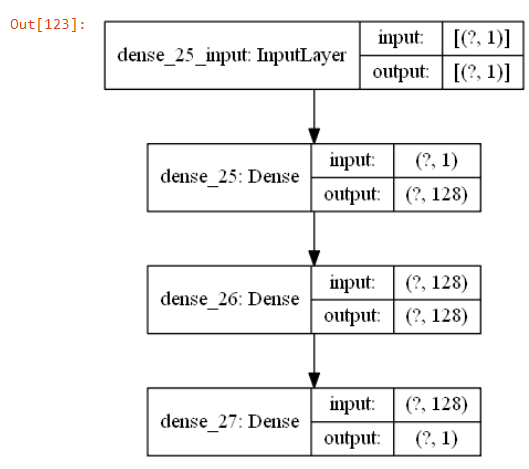

<span style=color:red>Try changing the number of epochs in the code block below (I would suggest less unless you want to fill your screen lots of funny looking code).  What happens if you use less training cycles?  How does your output compare to my original runs?

In [ ]:
## Save our results to an empty list so that we can capture this and plot it later
two_layer_model_results = []

## Set a random seed so we can reproduce the results across multiple runs of the notebook
random.seed(90210)

## Loop through all of the hidden layers and replace the hidden units in each iteration of tests
for i in nb_hiddens:
    
    ## Establish a new version of our model above
    two_layer_model = test_model_two(nb_hidden = i)
    
    ## Save the history of the model and use 15% of the training data to validate our model results
    ## Random seed - here as well
    history = two_layer_model.fit(X_train, y_train, epochs = 20, verbose = 2, validation_split = 0.15)
    
    ## Save the results into the list above
    two_layer_model_results.append(history)

In [ ]:
## Save the results of our validation MSE as well - whichever does the best from the three will get tested with the actual data
first_run_mse_b = two_layer_model_results[0].history['val_mse']
second_run_mse_b = two_layer_model_results[1].history['val_mse']
third_run_mse_b = two_layer_model_results[2].history['val_mse']

In [ ]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Plot scores on each trial for nested CV

## Set the figure size    
plt.figure(figsize= (15, 10))

## Plot Mean Squared Error to quickly visual the best performing two layer model
plt.plot(first_run_mse_b, 'r-o', label = "Two Layers / 48 hidden units - Validation MSE")
plt.plot(second_run_mse_b, 'y-o', label = "Two Layers / 128 hidden units - Validation MSE")
plt.plot(third_run_mse_b, 'g-o', label = "Two Layers / 256 hidden units - Validation MSE")

## Give some labels
plt.xlabel("No. of Epochs")
plt.ylabel("Mean Squared Error")

## Title and legend
plt.title("Validation MSE Comparison - Two Layer Neural Network")
plt.legend(loc = 'upper right')

## Set the correct number of training cycles on the x-axis - matplotlib likes to use it's own weird config!
ax = plt.gca()
ax.set_xticks(np.arange(0, 20, step = 1))

# Set the y-axis scale so we have a consistent comparison across models
ax.set_yticks(np.arange(0, 0.6, step = 0.1))

## Show the graph
plt.show()

Already we see a vast improvement with a two layer deep neural network.  The information "gained" from the first layer gets passed to the second layer, so the model has more of an opportunity to learn the structure of the data.  This is reflected in the fact that the validation MSE gradually drops after the first few epochs before starting to level out, as the model can't keep doing any better.
    
You should notice that the version of the two layer NN model that has 48 neron units per layer generally performs more poorly than the versions with 128 and 256 neurons per layer, even after multiple training epochs.  Depending on which random seed value you set prior to running the model, you may notice that the 128 and 256 neuron versions of the model oscillate between which one performs better.  This is a result of randomness in the training data and training process.  It's also a nice reminder that more hidden units isn't always going to necessarily lead to better performance.  The goal isn't to maximize the complexity of your model by smashing as many neurons as you can into it--the goal is to find the right balance of complexity and performance.

In [ ]:
# print("The lowest MSE that our one layer model reaches is {}".format(min(fourth_run_mse_b)))

When we look at the validation Mean Squared Error scores, we see that the second layer model does much better!  We're seeing significant improvement in the Mean Squared Error scores with more training epochs.  This means that the model is actually learning and getting better at making predictions.  The errors that the two layer NN makes get smaller and smaller with more chances/opportunities to learn.

## C.  <span style="color:red">Three Layer Model</span> (<i>deep</i>)

## The three layer model is identical to the first two, but with yet ANOTHER additional layer (which you see in the function below).  Everything else stays the same.

In [ ]:
def test_model_three(activation='relu', nb_hidden = 120):
    
    three_layer_model = Sequential()
    
    ## The first hidden layer will cycle through different hidden units
    ## The model expects rows of data with 1 variable (the input_dim=1 argument)
    three_layer_model.add(Dense(nb_hidden, input_dim = 1, activation = activation))
    
    ## The second hidden layer will have the same number of hidden units as the first layer and uses the relu activation function.
    three_layer_model.add(Dense(nb_hidden, activation = "relu"))
    
    ## The third hidden layer will have the same number of hidden units as the first layer and uses the relu activation function.
    three_layer_model.add(Dense(nb_hidden, activation = "relu"))
    
    ## The output layer has one node and uses the sigmoid activation function.
    three_layer_model.add(Dense(1, activation = "linear"))
    
    ## We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. 
    ## This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.
    three_layer_model.compile(loss = "mse", optimizer = "adam", metrics = ["mse"])
    
    ## Return the completed model
    return three_layer_model

## Now take a look at the model summary when we have three layers, specifically the `param #`and `traininable params`.  What you notice here, especially when comparing to the one and two layer models?  

In [ ]:
## You can change this to any number of neurons that you want - what happens when you do?
neurons = 128

sample_model_three = test_model_three(nb_hidden = neurons)

## This will show a quick summary table of the sample one layer model
print(sample_model_three.summary())
print()

In [ ]:
## This will show a diagram of the sample three layer model - FALSE no it will not because I screwed this up!
## plot_model(sample_model_three)

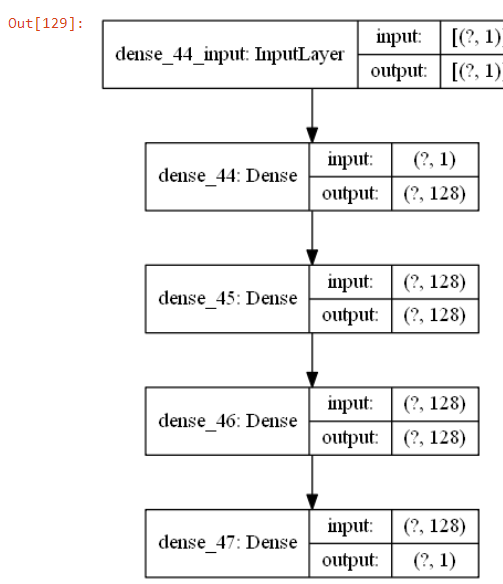

In [ ]:
## Save our results to an empty list so that we can capture this and plot it later
three_layer_model_results = []

## Set a random seed so we can reproduce the results across multiple runs of the notebook
random.seed(8675309)

## Loop through all of the hidden layers and replace the hidden units in each iteration of tests
for i in nb_hiddens:
    
    ## Establish a new version of our model above
    three_layer_model = test_model_three(activation='relu', nb_hidden = i)
    
    ## Save the history of the model and use 15% of the training data to validate our model results
    history = three_layer_model.fit(X_train, y_train, verbose = 2, epochs = 20, validation_split = 0.15)
    
    ## Save the results into the list above
    three_layer_model_results.append(history)

In [ ]:
## Save the results of our MSE
first_run_mse_c = three_layer_model_results[0].history['mse']
second_run_mse_c = three_layer_model_results[1].history['mse']
third_run_mse_c = three_layer_model_results[2].history['mse']

## Save the results of our validation MSE as well - whichever does the best from the three will get tested with the actual data
first_run_val_mse_c = three_layer_model_results[0].history['val_mse']
second_run_val_mse_c = three_layer_model_results[1].history['val_mse']
third_run_val_mse_c = three_layer_model_results[2].history['val_mse']

Remember very long ago when we started this journey and we talked about models "memorizing" data instead of "learning" the data?  Well now is a good time as any to revisit this, because we're likely hitting this behavior now.

<b>Overfitting</b>

Spoiler alert: by the time we build a three layer neural network for a <i>relatively</i> simple task like this, there is a <b>high</b> likelihood for <i>overfitting</i>.  Overfitting is the tendency of data mining procedures to tailor models to <i>training</i> data, at the expense of generalization to unseen data points (<i>testing</i> data).

How can I tell just by looking at the output of the training?  For each version of the three layer model we trained, after the twelfth epoch, all four versions of the three layer model converge (meet).
   
That means that after twelve training cycles, it doesn't matter how many hidden units we use - once we have created a NN with three layers, even 48 hidden units is enough for the model to minimize the Mean Squared Error of our "validation" data points to almost zero.  An MSE of almost zero means perfection - it is guessing each data point correctly, every time.

Here's a more in depth explanation (from my assignment notes):

<i>"When designing an algorithm to perform classification or regression, there is the chance that you will find occurrences in data that look like interesting patterns but do not generalize; this is called overfitting the data. All data mining procedures have the tendency to overfit to some extent, some more than others.</i>

<i>Generalization refers to the property of a model or modeling process where the model applies to data that were not used to actually build the model. In a case where you have developed a model that is "overfit", the model cannot generalize at all beyond the data that were used to build it.<br></i>

<i>Overfitting is the tendency of data mining procedures to tailor models to training data, at the expense of generalization to any unseen data points. For example, if you train a model so well on the training data that it can accurately predict churn, or label a malignant tumor with 100% accuracy every single time you run the analysis, there is very good likelihood that your model is overfit because it is essentially making ZERO mistakes, and not accounting for any errors or noise in the data.</i>

<i>The answer to this dilemma is not to skip using data mining procedures that don't overfit because they all do, nor is the answer to simply use models that produce less overfitting because of the trade-off between model complexity and possibility of overfitting. The best strategy is to recognize overfitting and manage complexity in a <b>principled</b> way."</i>

## Let's visualize this using a really scary looking code block :)

In [ ]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create two new sub plots so we can show the training and validation performance side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

## Save the new plots as variables to save us typing below
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

## Set up some variables since we will be calling all of these in the plots below.  It saves having to make changes on all four plots.
plot_title = "MSE Comparison - Three Layer Neural Network"
plot_xlabel = "Number of Training Epochs"
plot_ylabel = "Mean Squared Error"
plot_xticks = np.arange(0, 20, step = 1)
plot_yticks = np.arange(0, 0.6, step = 0.1)

## Plot the training and validation MSE on our "second" three layer neural network to compare how well they performed
ax1.plot(first_run_mse_c, 'y-o', label = "Three Layer / 48 hidden units - Training MSE")
ax1.plot(first_run_val_mse_c, 'k-o', label = "Three Layer / 48 hidden units - Validation MSE")

## Plot the loss on our three neural networks to compare how well they performed
ax2.plot(second_run_mse_c, 'g-o', label = "Three Layer / 128 hidden units - Training MSE")
ax2.plot(second_run_val_mse_c, 'k-o', label = "Three Layer / 128 hidden units - Validation MSE")

## Plot the loss on our three neural networks to compare how well they performed
ax3.plot(third_run_mse_c, 'b-o', label = "Three Layer / 256 hidden units - Training MSE")
ax3.plot(third_run_val_mse_c, 'k-o', label = "Three Layer / 256 hidden units - Validation MSE")

## Set up some variables since we will be calling all of these in the plots below.  It saves having to make changes on all four plots.
plot_title = "MSE Comparison - Three Layer Neural Network"
plot_xlabel = "Number of Training Epochs"
plot_ylabel = "Mean Squared Error"
plot_xticks = np.arange(0, 20, step = 1)

## Save all our plots to a list for the next loop
plot_list = [ax1, ax2, ax3]

## Loop through all of our plots and set the title, x-label, y-label, x-ticks, legend
for ax in plot_list:
    ax.set_title(plot_title)
    ax.set_xlabel(plot_xlabel)
    ax.set_ylabel(plot_ylabel)
    ax.set_xticks(plot_xticks)
    ax.set_yticks(plot_yticks)
    ax.legend()

## Show the beautiful graphs
plt.show()

## See how tight the lines between the "training" MSE and the "validation" MSE are to each other?  The model is basically memorizing data at this point.

Here's a simple analogy to explain what is happening and why this is a problem for us:

"Training" a human to perform a simple task is normally pretty straightforward (at least, we like to think so).  For example, when we are kids, we normally start to learn math by memorizing a sequence of numbers, let's say 0 through 100.  It's pretty easy to do this, correct?

Even with zero exposure to numbers before, we intuitively start to remember things that we are shown and start to recognize patterns really quickly.  A machine learning algorithm can do this too, and with numbers it can do this <i>incredibly</i> fast.

The next step after memorizing the numbers on a line is figuring out how to combine them to make <i>new</i> numbers - this is MATH!  A ML is good at memorizing but can't think outside the bounds of what it is programmed to do.  It will never know how to do math unless we tell it how!

# <span style="color:#ffcc33">VI.  Compare & Visualize Performance of 3 Different Neural Networks

OK at this point your probably already checked out and thinking about the pizza we're going to have for lunch... Don't worry, I'm with you!  But we're just going to do one more thing!

          How about a slice?          
                     ___              
                    |  ~~--.          
                    |%=@%%/           
                    |o%%%/            
                 __ |%%o/             
           _,--~~ | |(_/ ._           
        ,/'  m%%%%| |o/ /  `\.        
       /' m%%o(_)%| |/ /o%%m `\       

What I am going to do now is take the three "best" Neural Network models, the first with one layer, the second with two layers, and the third with three layers.  This is based on what we determined were the best performing earlier.

I will then re-train the models except this time we get to bring in that <u>testing</u> data we set aside at the very beginning.  This testing data now becomes my validation set; I set this apart at the very beginning of the process, for the specific purpose of seeing how the models would perform with data they had not seen before.  Now we're confident that our best models are ready to compete against each other for the title of deepest, smartest neural network.

Artist's rendition of NN ready to fight:

(ง'̀-'́)ง

In addition, I will capture the ROOT mean squared error after these runs to see how well it improves over time.  This metric (which, you guessed it, is just the square root of the MSE), is what I will ultimately use to gauge the effectiveness of the three models.

In [ ]:
## Let the audience decide: how many neurons should we use for each?

## NB Hidden Units - One Layer - ??
## NB Hidden Units - Two Layers - ??
## NB Hidden Units - Three Layers - ??

one_layer_neurons = 48
two_layer_neurons = 128
three_layer_neurons = 48

one_layer_label = "One Layer NN" + " / " + str(one_layer_neurons) + " neurons - MSE"
two_layer_label = "Two Layer NN" + " / " + str(two_layer_neurons) + " neurons - MSE"
three_layer_label = "Three Layer NN" + " / " + str(three_layer_neurons) + " neurons - MSE"

In [ ]:
## Create another empty list to store the final results
## PUT THIS IN A SEPARATE CELL BLOCK SO I DON'T OVERWRITE MY RESULTS - Yes I did this already MANY times
final_test_results = []

In [ ]:
## Establish a new version of our model above
testing_one_layer_model = test_model_one(nb_hidden = one_layer_neurons)
    
## Save the history of the model
testing_history = testing_one_layer_model.fit(X_train, y_train, epochs = 20, verbose = 0, 
                                              validation_data = (X_test, y_test))  ## Validate using the testing data

## Save the results into the list above
final_test_results.append(testing_history)

In [ ]:
## Establish a new version of our two layer model above
testing_two_layer_model = test_model_two(nb_hidden = two_layer_neurons)
    
    ## Save the history of the model
testing_history = testing_two_layer_model.fit(X_train, y_train, epochs = 20, verbose = 0, 
                                              validation_data = (X_test, y_test))  ## Validate using the testing data
    
## Save the results into the list above
final_test_results.append(testing_history)

In [ ]:
## Establish a new version of our three layer model above
testing_three_layer_model = test_model_three(nb_hidden = three_layer_neurons)
    
    ## Save the history of the model
testing_history = testing_three_layer_model.fit(X_train, y_train, epochs = 20, verbose = 0, 
                                              validation_data = (X_test, y_test))  ## Validate using the testing data
    
## Save the results into the list above
final_test_results.append(testing_history)

## Graph the final comparison results

In [ ]:
## Save all of the output to separate lists - this will be helpful for plotting the results later
## It's important that we show both the training and testing loss, now that we're using the actual testing data for performance comparisons

## MSE across the three different neural networks
one_hidden_layer_mse = final_test_results[0].history['mse']
two_hidden_layer_mse = final_test_results[1].history['mse']
three_hidden_layer_mse = final_test_results[2].history['mse']

## Testing (validation0 MSE across the three different neural networks
one_hidden_layer_val_mse = final_test_results[0].history['val_mse']
two_hidden_layer_val_mse = final_test_results[1].history['val_mse']
three_hidden_layer_val_mse = final_test_results[2].history['val_mse']

In [ ]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Set the figure size    
plt.figure(figsize= (15, 8))

## Plot the loss on our three neural networks to compare how well they performed
plt.plot(one_hidden_layer_mse, 'k', lw = 3, label = one_layer_label)
plt.plot(two_hidden_layer_mse, 'b', label = two_layer_label)
plt.plot(three_hidden_layer_mse, 'g--', lw = 3, label = three_layer_label)

## Set the title, add x/y labels, and a legend for the first plot
plt.title("Mean Squared Error Comparison - Three Neural Networks")
plt.xlabel("No. of Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()

## Set the correct number of training cycles on the x-axis - matplotlib likes to use it's own weird config!
ax = plt.gca()
ax.set_xticks(np.arange(0, 20, step = 1))

## Show the beautiful graph
plt.show()

I only plot the MSE here because the two and three layer models do SO well that they start to have MSE close to zero; this makes for an unfair comparison to the poor one layer NN model stuck at .5,  and also makes it difficult to visualize.

Since it is really hard to tell <i>just</i> how well the two and three layer models are performing, I create a final set of plots below, using the <i>Root</i> Mean Squared Error, so that we can truly observe the difference in the three networks.

In [ ]:
## Import the square root function from math library - the last random import of the day!
from math import sqrt

## Calculate the Root MSE for the one layer NN
plot_one_layer_rmse = [sqrt(i) for i in one_hidden_layer_val_mse]

## Calculate the Root MSE for the two layer NN
## plot_two_layer_rmse = [sqrt(i) for i in two_hidden_layer_val_mse]

## Calculate the Root MSE for the three layer NN
## plot_three_layer_rmse = [sqrt(i) for i in three_hidden_layer_val_mse]

## Keep these two variables commented for now - we will use these code blocks to 
plot_two_layer_rmse = [sqrt(i) for i in two_hidden_layer_val_mse[10:20]]
plot_three_layer_rmse = [sqrt(i) for i in three_hidden_layer_val_mse[10:20]]

In [ ]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create two new sub plots so we can show the training and validation performance side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

## Save the new plots as variables to save us typing below
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

## Set up some variables since we will be calling all of these in the plots below.  It saves having to make changes on all four plots.
plot_title = "Testing Root Mean Squared Error (zoomed in)"
plot_xlabel = "Number of Training Epochs"
plot_ylabel = "*Root* Mean Squared Error"
plot_xticks = np.arange(0, 20, step = 1)

## Plot the loss on our three neural networks to compare how well they performed
ax1.plot(plot_one_layer_rmse, 'k', lw = 3, label = "One Layer NN - Testing RMSE")
ax1.set_xticks(plot_xticks)

## Plot the loss on our three neural networks to compare how well they performed
ax2.plot(plot_two_layer_rmse, 'b', label = "Two Layer NN - Testing RMSE")

## Plot the loss on our three neural networks to compare how well they performed
ax3.plot(plot_three_layer_rmse, 'g--', lw = 3, label = "Three Layer NN - Testing RMSE")

## Save all our plots to a list for the next loop
plot_list = [ax1, ax2, ax3]

## Loop through all of our plots and set the title, x-label, y-label, x-ticks, legend
for ax in plot_list:
    ax.set_title(plot_title)
    ax.set_xlabel(plot_xlabel)
    ax.set_ylabel(plot_ylabel)
    ax.legend()
    
    ## Remember to un-comment this out when we "zoom out" 
    ## ax.set_xticks(plot_xticks)

## Show the beautiful graph
plt.show()

Much better!  Now we can <i>really</i> see what is happening to our error as the models have more and more training applied.  This plots make look differently on your machine than they do on mine; don't fret, I'm sure you did something terribly wrong and screwed it up big time :)
    
* The first plot shows that the one layer NN gradually learns throughout the training cycles but never gets below 0.675.
<br>
    
* <span style=color:blue>The second plot shows that the two layer NN (after the tenth training epoch - I start from this point so the plot doesn't get skewed by the first few runs) keeps learning until about the fourteenth trip through and then starts to level off.  Most importantly, however, it stays pretty consistent from here.</span>
<br>

* <span style=color:green>The third plot shows that the three layer NN (after the tenth training epoch - I start from this point so the plot doesn't get skewed by the first few runs) has already learned what it needed to learn from almost the very beginning.  The unfortunate side effect of this is that it starts to behave erratically - the three layer model is likely overfitting by this point, and doing so well that the RMSE is miniscule.</span>

## Out of the three final evaluation models, I would probably stick with the two layer model; based on the output above, it doesn't seem to have the opportunity to overfit and start demonstrating uneven performance at the end of twenty training epochs, like the three layer model was demonstrating.  We can conclude that deeper may not ALWAYS be better, and that it is important to put steps in place to prevent your model from overfitting.

# <span style="color:#ffcc33">VII.  Acknowledgements & Additional Resources

## Works cited:

[1]  Liao, Q., Mhaskar H. & Poggio, T.  (2017).  <i>When and Why Are Deep Networks Better than Shallow Ones?</i> (Proceedings of the Thirty-First AAAI Conference on Artificial Intelligence).  Retreived November 17, 2019 from AAAI Publications: https://www.aaai.org/ocs/index.php/AAAI/AAAI17/paper/viewPaper/14849

[2] Géron, Aurélien.  (2019).  <i>Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd Edition)</i>.  Sebastopol, CA:  O’Reilly Media, Inc.

[3]  Fawcett, T. & Provost, F.  (2013).  <i>Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking</i>.  Sebastopol, CA:  O’Reilly Media, Inc.

## Library information:

[1] [Keras: The Python Deep Learning library](https://keras.io/)

[2] [Tensorflow: Python API Guide](https://www.tensorflow.org/api_docs/python/)

[3] [scikit-learn: machine learning in Python](https://scikit-learn.org/stable/)

## Further reading:

[1] [Dropout - dropping a portion of the dataset](https://github.com/keras-team/keras/blob/master/keras/layers/core.py#L81)

[2] [Batch normalization](https://keras.io/layers/normalization/)

# I would like to thank ALL of the organizers of the Day of Data event for putting this together, and  Alison Link for letting some dork from Connecticut get not one, but two opportunities to present his work to members of the University (and for editing the notebook to make it so much better!).

# I would also like to thank Professor Yicheng Song from the Carlson School of Management for introducing our cohort to a wonderful set of new tools for data discovery and analysis.  

# And finally, thank you to all of the participants of the session today.  I sincerely hope you learned something that you did not know before entering the room, and that I was able to demonstrate that "machine learning" or AI technology isn't something to be afraid of; mastery of the basic concepts behind how it works has never been more important that it is today.

And finally, an artist's rendition of me after our session:

(╯°□°)╯︵ ┻━┻